## Load data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv') # Load test data

building = pd.read_csv('building_metadata.csv')

weather_train = pd.read_csv('weather_train.csv')

weather_test = pd.read_csv('weather_test.csv')

## Preparing input for the model

In [33]:
train_7=train_df[train_df['building_id']==7]

In [34]:
test_7=test_df[test_df['building_id']==7]

In [35]:
building_7=building[building['building_id']==7]

In [36]:
import gc
# train_df = train_df.merge(building, on='building_id', how='left')
# test_df = test_df.merge(building, on='building_id', how='left')

# train_df = train_df.merge(weather_train, on=['site_id', 'timestamp'], how='left')
# test_df = test_df.merge(weather_test, on=['site_id', 'timestamp'], how='left')
# del weather_train, weather_test,building
# gc.collect();
train_7 = train_7.merge(building_7, on='building_id', how='left')
test_7 = test_7.merge(building_7, on='building_id', how='left')

train_7 = train_7.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test_7 = test_7.merge(weather_test, on=['site_id', 'timestamp'], how='left')
# del weather_train, weather_test,building
gc.collect();

In [37]:
import datetime
import pytz# define epoch, the beginning of times in the UTC timestamp world
epoch = datetime.datetime(1900,1,1,0,0,0)

In [38]:
import datetime
from datetime import datetime
# train_df['new_timestamp'] = pd.to_datetime(train_df['timestamp'],format='%Y-%m-%d %H:%M:%S') #It also works

train_7['timestamp'] = train_7['timestamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
train_7['timestamp'] =train_7['timestamp'].apply(lambda x: (x-epoch).total_seconds())
test_7['timestamp'] = test_7['timestamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
test_7['timestamp'] =test_7['timestamp'].apply(lambda x: (x-epoch).total_seconds())

In [39]:
train_7.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,7,0,3.660595e+09,0.0,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,7,0,3.660599e+09,0.0,0,Education,121074,1989.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,7,0,3.660602e+09,0.0,0,Education,121074,1989.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,7,0,3.660606e+09,0.0,0,Education,121074,1989.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,7,0,3.660610e+09,0.0,0,Education,121074,1989.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [40]:
train_7['round_reading']=[round(x,-2) for x in train_7.meter_reading]

In [41]:
train_7=train_7.drop(['primary_use', 'year_built', 'floor_count', 'cloud_coverage', 'precip_depth_1_hr'],axis=1)

In [42]:
train_7.head()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,round_reading
0,7,0,3.660595e+09,0.0,0,121074,25.0,20.0,1019.7,0.0,0.0,0.0
1,7,0,3.660599e+09,0.0,0,121074,24.4,21.1,1020.2,70.0,1.5,0.0
2,7,0,3.660602e+09,0.0,0,121074,22.8,21.1,1020.2,0.0,0.0,0.0
3,7,0,3.660606e+09,0.0,0,121074,21.1,20.6,1020.1,0.0,0.0,0.0
4,7,0,3.660610e+09,0.0,0,121074,20.0,20.0,1020.0,250.0,2.6,0.0


In [43]:
train_7=train_7.dropna()
# train_7.isnull().sum().sum() #With this line of code you can check if there is any nan value

In [44]:
train_7.head()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,round_reading
0,7,0,3.660595e+09,0.0,0,121074,25.0,20.0,1019.7,0.0,0.0,0.0
1,7,0,3.660599e+09,0.0,0,121074,24.4,21.1,1020.2,70.0,1.5,0.0
2,7,0,3.660602e+09,0.0,0,121074,22.8,21.1,1020.2,0.0,0.0,0.0
3,7,0,3.660606e+09,0.0,0,121074,21.1,20.6,1020.1,0.0,0.0,0.0
4,7,0,3.660610e+09,0.0,0,121074,20.0,20.0,1020.0,250.0,2.6,0.0


## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = train_7.drop(['meter_reading','round_reading'],axis=1)
y = train_7['round_reading']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [125]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

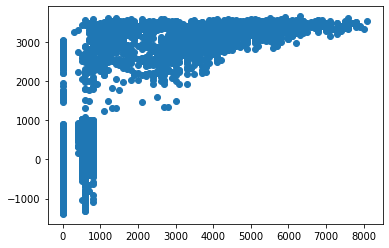

In [126]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

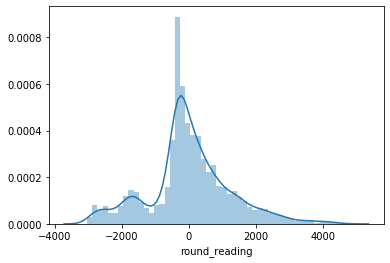

In [127]:
sns.distplot((y_test-predictions),bins=50);

In [128]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

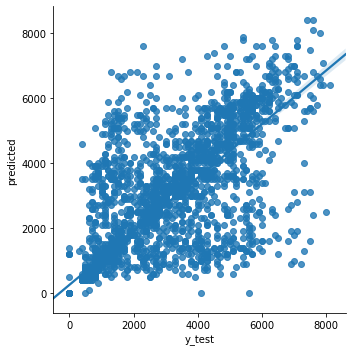

In [129]:
sns.lmplot('y_test','predicted',plot_df,palette='plasma')

## Decision Trees

First one single decision tree.

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
dtree = DecisionTreeRegressor()

In [132]:
dtree=dtree.fit(X_train,y_train)

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [133]:
predictions = dtree.predict(X_test)

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [135]:
print(confusion_matrix(y_test,predictions)s)

[[1108    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [136]:
plot_df=pd.DataFrame(list(zip(y_test, predictions)),columns=['y_test','predicted'])

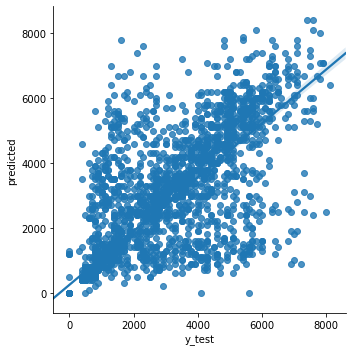

In [137]:
sns.lmplot('y_test','predicted',plot_df,palette='plasma')

Text(0.5, 1.0, '')

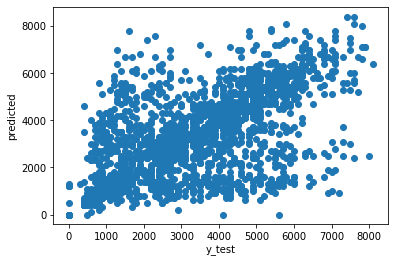

In [138]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.title('')

In [139]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, predictions ))

0.5221865396520962

In [140]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

1081.3255863885968

In [141]:
importances = dtree.feature_importances_

In [142]:
X.head()

,building_id,meter,timestamp,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,7,0,3.660595e+09,0,121074,25.0,20.0,1019.7,0.0,0.0
1,7,0,3.660599e+09,0,121074,24.4,21.1,1020.2,70.0,1.5
2,7,0,3.660602e+09,0,121074,22.8,21.1,1020.2,0.0,0.0
3,7,0,3.660606e+09,0,121074,21.1,20.6,1020.1,0.0,0.0
4,7,0,3.660610e+09,0,121074,20.0,20.0,1020.0,250.0,2.6


In [143]:
len(X.columns)

10

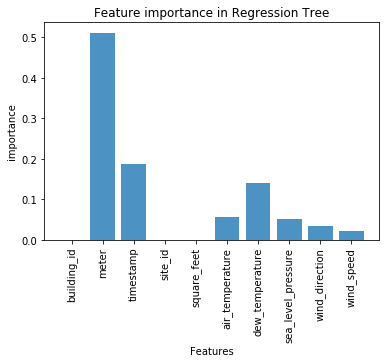

In [146]:
plt.bar(range(len(dtree.feature_importances_)), dtree.feature_importances_,align='center',alpha=0.8)
plt.xlabel('Features')
plt.ylabel('importance')
plt.xticks(np.arange(len(X.columns)), X.columns,rotation=90)
plt.title('Feature importance in Regression Tree')
plt.show()

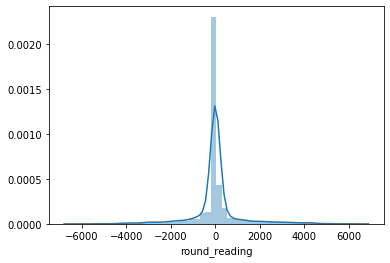

In [145]:
sns.distplot((y_test-predictions),bins=50);

## Random Forests

Now let's compare the decision tree model to a random forest.


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,rfc_pred))

[[2319   38]
 [ 100   78]]


In [30]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2357
       100.0       0.67      0.44      0.53       178

    accuracy                           0.95      2535
   macro avg       0.82      0.71      0.75      2535
weighted avg       0.94      0.95      0.94      2535

